In [6]:
# Imports

import os

import tensorflow as tf
import keras_preprocessing

from tensorflow.keras import layers
from tensorflow.keras import Model
#from tensorflow.keras.applications.inception_v3 import InceptionV3

F:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
# Get craete a pre trained model with previous weights

local_weights_file = 'aslAtoZ.h5'

pre_trained_model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
pre_trained_model.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv

In [8]:
# Imports for working on images

import numpy as np
#from google.colab import files
#from keras.preprocessing import image
import cv2
from PIL import Image

In [4]:
# Testing images using Keras Pre Processor
'''
import numpy as np
#from google.colab import files
from keras.preprocessing import image

#uploaded = files.upload()
#for fn in uploaded.keys():

# predicting images
path = 'A_test.jpg'
img = image.load_img(path, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = pre_trained_model.predict(images, batch_size=10)
print(path)
#print(classes)
prediction = classes.tolist()
print(prediction)
pos = prediction.index(max(prediction))
'''

"\nimport numpy as np\n#from google.colab import files\nfrom keras.preprocessing import image\n\n#uploaded = files.upload()\n#for fn in uploaded.keys():\n\n# predicting images\npath = 'A_test.jpg'\nimg = image.load_img(path, target_size=(200, 200))\nx = image.img_to_array(img)\nx = np.expand_dims(x, axis=0)\n\nimages = np.vstack([x])\nclasses = pre_trained_model.predict(images, batch_size=10)\nprint(path)\n#print(classes)\nprediction = classes.tolist()\nprint(prediction)\npos = prediction.index(max(prediction))\n"

NameError: name 'Image' is not defined

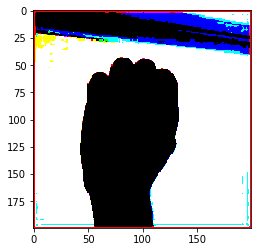

In [14]:
# Taking image input using OpenCV

import matplotlib.pyplot as plt
%matplotlib inline

testimg = cv2.imread('E_test.jpg')

_,thresh1 = cv2.threshold(testimg,127,255,cv2.THRESH_BINARY)
plt.imshow(thresh1)

im = Image.fromarray(thresh1, 'RGB')
# Resizing into 200x200
im = im.resize((200,200))
img_array = np.array(im)
img_array = np.expand_dims(img_array, axis=0)
prediction = pre_trained_model.predict(img_array)

print(type(prediction))
prediction = prediction.tolist()
print((prediction))

predAns = chr(prediction[0].index(max(prediction[0])) + 65)
print(predAns)


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


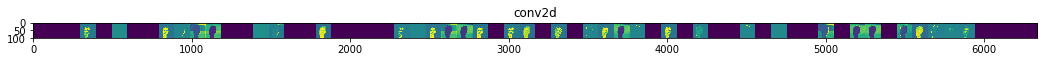

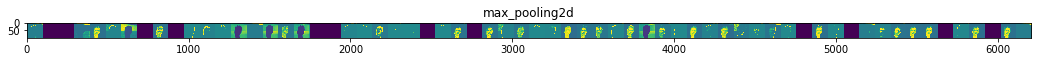

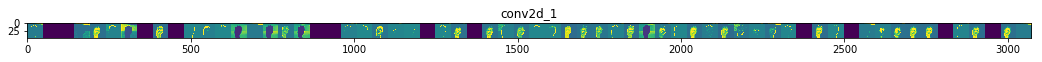

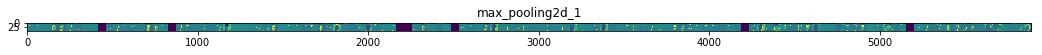

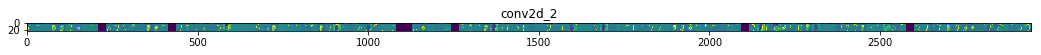

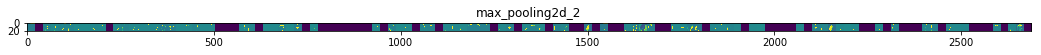

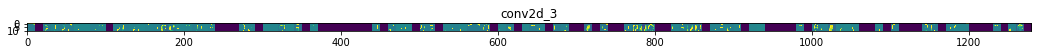

In [36]:
# Display convolution and max pooling stages of a given image

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in pre_trained_model.layers[1:]]


visualization_model = tf.keras.models.Model(inputs = pre_trained_model.input, outputs = successive_outputs)

img_path = 'E_test.jpg'
img = load_img(img_path, target_size=(200, 200))  

x   = img_to_array(img)
x   = x.reshape((1,) + x.shape)

# Rescale by 1/255
x /= 255.0

successive_feature_maps = visualization_model.predict(x)

# Each layer is given a name
layer_names = [layer.name for layer in pre_trained_model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    n_features = feature_map.shape[-1]  
    size       = feature_map.shape[ 1]  
   
    display_grid = np.zeros((size, size * n_features))
 
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x


    scale = 18. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )


In [7]:
'''
# Working on the test image

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(testimg,"This is D",(50,50),font,0.5,(255,0,0),2)

cv2.imshow("testImg", testimg)

plt.imshow(im)
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()
'''

'\n# Working on the test image\n\n%matplotlib inline\n\nimport matplotlib.pyplot as plt\nimport matplotlib.image as mpimg\n\nfont = cv2.FONT_HERSHEY_SIMPLEX\ncv2.putText(testimg,"This is D",(50,50),font,0.5,(255,0,0),2)\n\ncv2.imshow("testImg", testimg)\n\nplt.imshow(im)\nplt.show()\n\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n'

In [37]:
# Real time video feed

video = cv2.VideoCapture(0)

while(True):
    
    ret, frame = video.read()
    _,thresh2 = cv2.threshold(frame,127,255,cv2.THRESH_BINARY)
    #cv2.waitKey(10)
    im = Image.fromarray(frame, 'RGB')
    # Resizing into 200x200
    im = im.resize((200,200))
    img_array = np.array(im)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = pre_trained_model.predict(img_array)

    #print(type(prediction))
    prediction = prediction.tolist()
    #print((prediction))

    predAns = chr(prediction[0].index(max(prediction[0])) + 65)
    #print(predAns)
    predText = "This is : " + str(predAns)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame,predText,(50,50),font,0.5,(255,0,0),2)

    cv2.imshow("Capturing", frame)
    cv2.imshow("Threshold-ing", thresh2)
    
    key=cv2.waitKey(1)
    if key == ord('q'):
        break

video.release()
cv2.destroyAllWindows()

In [5]:
# organize imports
import cv2
import imutils
from PIL import Image
import numpy as np

# global variables
bg = None

# time is what we need
import time

In [2]:
start = time.clock()
end = time.clock()
diff = end - start
while (end <= 5):
    end = time.clock()
    diff = end - start
print(diff)

4.999999144727867


In [6]:
#-------------------------------------------------------------------------------
# Function - To find the running average over the background
#-------------------------------------------------------------------------------
def run_avg(image, aWeight):
    global bg
    # initialize the background
    if bg is None:
        bg = image.copy().astype("float")
        return

    # compute weighted average, accumulate it and update the background
    cv2.accumulateWeighted(image, bg, aWeight)

In [7]:
#-------------------------------------------------------------------------------
# Function - To segment the region of hand in the image
#-------------------------------------------------------------------------------
def segment(image, threshold=25):
    global bg
    # find the absolute difference between background and current frame
    diff = cv2.absdiff(bg.astype("uint8"), image)

    # threshold the diff image so that we get the foreground
    thresholded = cv2.threshold(diff,
                                threshold,
                                255,
                                cv2.THRESH_BINARY)[1]

    # get the contours in the thresholded image
    (_, cnts, _) = cv2.findContours(thresholded.copy(),
                                    cv2.RETR_EXTERNAL,
                                    cv2.CHAIN_APPROX_SIMPLE)

    # return None, if no contours detected
    if len(cnts) == 0:
        return
    else:
        # based on contour area, get the maximum contour which is the hand
        segmented = max(cnts, key=cv2.contourArea)
        return (thresholded, segmented)

In [11]:
#-------------------------------------------------------------------------------
# Main function
#-------------------------------------------------------------------------------
if __name__ == "__main__":
    # initialize weight for running average
    aWeight = 0.5
    
    # working on time frames
    start = time.clock()
    end = time.clock()
    diff = end - start

    # get the reference to the webcam
    camera = cv2.VideoCapture(0)

    # region of interest (ROI) coordinates
    top, right, bottom, left = 10, 350, 225, 590

    # initialize num of frames
    num_frames = 0

    # keep looping, until interrupted
    while(True):
        # get the current frame
        (grabbed, frame) = camera.read()

        # resize the frame
        frame = imutils.resize(frame, width=700)

        # flip the frame so that it is not the mirror view
        frame = cv2.flip(frame, 1)

        # clone the frame
        clone = frame.copy()

        # get the height and width of the frame
        (height, width) = frame.shape[:2]
        #dims = height + " , " + width

        # get the ROI
        roi = frame[top:bottom, right:left]

        # convert the roi to grayscale and blur it
        gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        gray = cv2.GaussianBlur(gray, (7, 7), 0)

        # to get the background, keep looking till a threshold is reached
        # so that our running average model gets calibrated
        if num_frames < 30:
            run_avg(gray, aWeight)
        else:
            
            # segment the hand region
            hand = segment(gray)
            while(diff < 5):
                end = time.clock()
                diff = end - start
            
            # check whether hand region is segmented
            if hand is not None:
                # if yes, unpack the thresholded image and
                # segmented region
                (thresholded, segmented) = hand

                # draw the segmented region and display the frame
                cv2.drawContours(clone, [segmented + (right, top)], -1, (0, 0, 255))
                cv2.imshow("Thesholded", thresholded)
                #cv2.imshow("Segmented", segmented)
                im = Image.fromarray(thresholded)
                
                #im = Image.fromarray(thresholded, 'RGB')
                # Resizing into 200x200
                
                im = im.resize((200,200))
                #cv.imshow("Resized", im)
                
                img_array = np.array(im)
                img_array = np.expand_dims(img_array, axis=0)
                '''
                prediction = pre_trained_model.predict(img_array)

                #print(type(prediction))
                prediction = prediction.tolist()
                #print((prediction))

                predAns = chr(prediction[0].index(max(prediction[0])) + 65)
                #print(predAns)
                predText = "This is : " + str(predAns)
                font = cv2.FONT_HERSHEY_SIMPLEX
                cv2.putText(frame,predText,(50,50),font,0.5,(255,0,0),2)
                '''
        # draw the segmented hand
        cv2.rectangle(clone, (left, top), (right, bottom), (0,255,0), 2)

        # increment the number of frames
        num_frames += 1

        # display the frame with segmented hand
        cv2.imshow("Video Feed", clone)

        # observe the keypress by the user
        keypress = cv2.waitKey(1) & 0xFF

        # if the user pressed "q", then stop looping
        if keypress == ord("q"):
            break

# free up memory
camera.release()
cv2.destroyAllWindows()